In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import lambertw

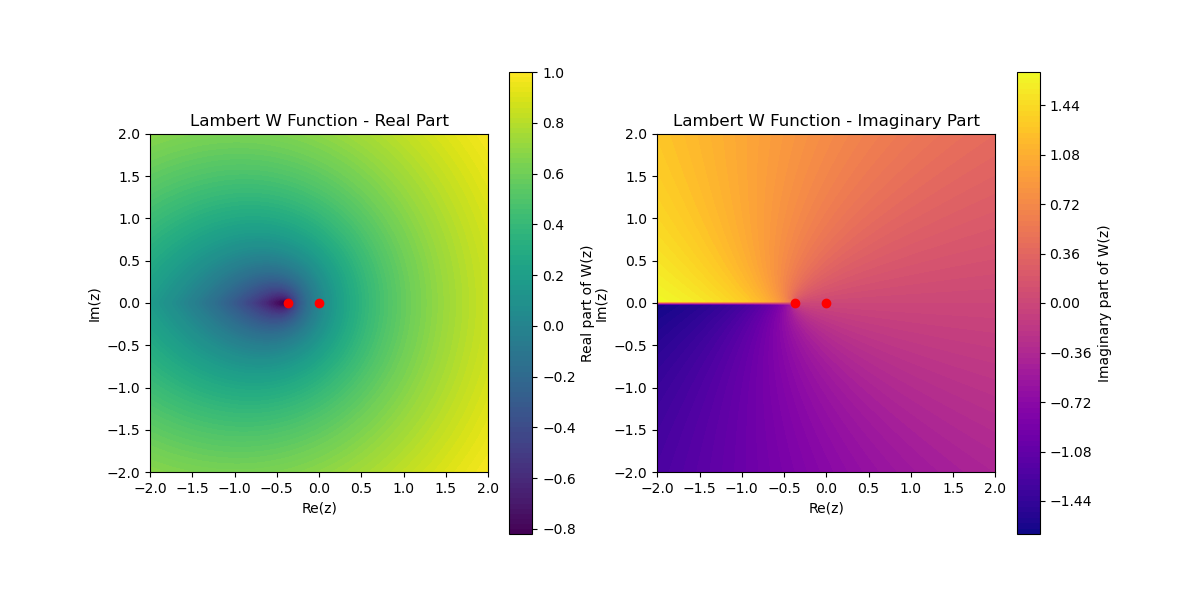

In [15]:
X, Y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
Z = lambertw(X + 1j * Y)
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax1.contourf(X, Y, Z.real, levels=100, cmap='viridis')
plt.colorbar(ax1.contourf(X, Y, Z.real, levels=100, cmap='viridis'), ax=ax1, label='Real part of W(z)')
plt.plot(0, 0, 'ro') # Mark the origin
plt.plot(-np.exp(-1), 0, 'ro') # Mark the branch point at (-exp(-1), 0)
ax1.set_aspect('equal', adjustable='box')
ax1.set_title('Lambert W Function - Real Part')
ax1.set_xlabel('Re(z)')
ax1.set_ylabel('Im(z)')

ax2 = fig.add_subplot(1,2,2)
ax2.contourf(X, Y, Z.imag, levels=100, cmap='plasma')
plt.colorbar(ax2.contourf(X, Y, Z.imag, levels=100, cmap='plasma'), ax=ax2, label='Imaginary part of W(z)')
plt.plot(0, 0, 'ro') # Mark the origin
plt.plot(-np.exp(-1), 0, 'ro') # Mark the branch point at (-exp(-1), 0)
ax2.set_aspect('equal', adjustable='box')
ax2.set_title('Lambert W Function - Imaginary Part')
ax2.set_xlabel('Re(z)')
ax2.set_ylabel('Im(z)')
plt.show()

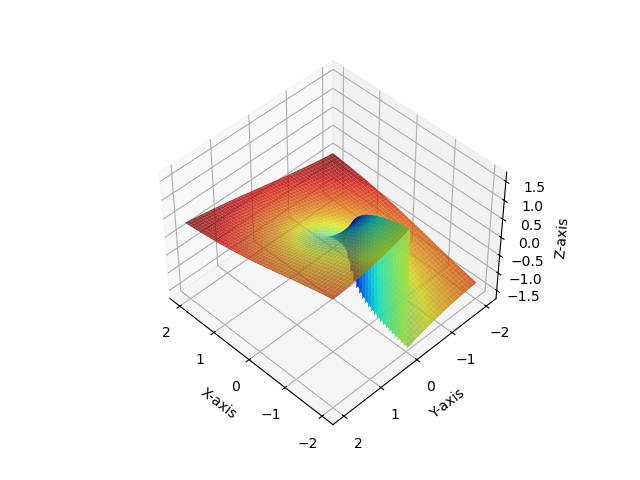

In [16]:
from matplotlib import cm
from matplotlib.colors import Normalize


fig = plt.figure()
ax1 = fig.add_subplot(1, 1 ,1 ,projection='3d')

W = Z.real
norm = Normalize(vmin=W.min(), vmax=W.max())
colormap = cm.jet
colorsW = colormap(norm(W))

"""
WW = Z.real
norm = Normalize(vmin=WW.min(), vmax=WW.max())
colorsWW = cm.viridis(norm(WW))
"""

ax1.view_init(elev=45, azim=135, roll=0)
ax1.plot_surface(X, Y, Z.imag, facecolors=colorsW, edgecolor='none', alpha=0.8)


ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_zlabel('Z-axis')

plt.show()

In [18]:
from ipywidgets import interact, IntSlider
%matplotlib widget


fig = plt.figure()
ax1 = fig.add_subplot(1, 1 ,1 ,projection='3d')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_zlabel('Z-axis')

W = Z.real
norm = Normalize(vmin=W.min(), vmax=W.max())
colormap = cm.jet
colorsW = colormap(norm(W))

"""
WW = Z.real
norm = Normalize(vmin=WW.min(), vmax=WW.max())
colorsWW = cm.viridis(norm(WW))


plt.show()
"""
@interact(elev=IntSlider(min=-180, max=180, step=10, value=30, continuous_update=False), 
          azim=IntSlider(min=-180, max=180, step=10, value=30, continuous_update=False))
def update_view(elev, azim):
    ax1.view_init(elev=elev, azim=azim)
    ax1.plot_surface(X, Y, Z.imag, facecolors=colorsW, edgecolor='none', alpha=0.8)
    plt.show()
    





interactive(children=(IntSlider(value=30, continuous_update=False, description='elev', max=180, min=-180, step…